In [ ]:
!pip install pycaret

In [1]:
# Import necessary libraries
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for numerical operations
from sklearn.feature_extraction.text import TfidfVectorizer  # Used for text vectorization
from imblearn.over_sampling import SMOTE  # Used for handling imbalanced datasets
import warnings  # Used for managing warnings
warnings.filterwarnings("ignore")  # Ignores warnings during execution

# PyCaret Script
import pandas as pd  # Used for data manipulation and analysis
from pycaret.classification import *  # Imports all modules from pycaret.classification
from textblob import TextBlob  # Used for sentiment analysis


In [2]:
df=pd.read_csv('imdb-movies-dataset.csv')

In [3]:
df.head(3)

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...


In [4]:
movies = df[['Poster','Title', 'Year', 'Genre', 'Rating', 'Director', 'Cast', 'Description', 'Review']]  # Selects specific columns for analysis

In [5]:
movies.head(3)

,Poster,Title,Year,Genre,Rating,Director,Cast,Description,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","Solène, a 40-year-old single mom, begins an un...","This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","Many years after the reign of Caesar, a young ...","I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","In 1963 Michigan, business rivals Kellogg's an...",Pretty much the worst criticism you can lay on...


In [6]:
movies.info()  # Provides information about the DataFrame (data types, non-null values, etc.)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Poster       10000 non-null  object 
 1   Title        10000 non-null  object 
 2   Year         9850 non-null   float64
 3   Genre        9993 non-null   object 
 4   Rating       9596 non-null   float64
 5   Director     9995 non-null   object 
 6   Cast         9961 non-null   object 
 7   Description  10000 non-null  object 
 8   Review       9484 non-null   object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\ammunandhu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


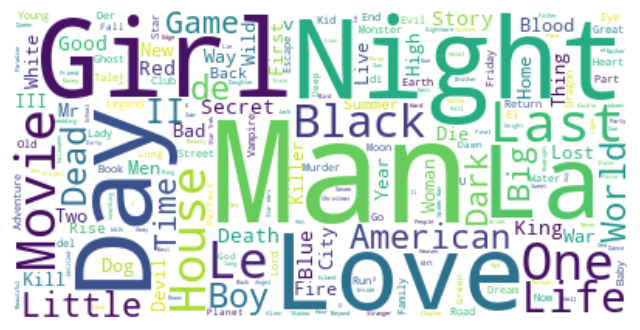

: 

In [11]:
# Combine all titles into a single string
text = " ".join(title for title in movies.Title)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
movies.describe()  # Provides descriptive statistics of the DataFrame (mean, std, min, max, etc.)


,Year,Rating
count,9850.000000,9596.000000
mean,2005.761421,6.438610
std,18.958005,1.051412
min,1929.000000,1.300000
25%,1997.000000,5.800000
50%,2012.000000,6.500000
75%,2021.000000,7.200000
max,2025.000000,9.700000


In [8]:
movies.isnull().sum()  # Checks for missing values in each column and displays the count


Poster           0
Title            0
Year           150
Genre            7
Rating         404
Director         5
Cast            39
Description      0
Review         516
dtype: int64

In [9]:
# Handle missing values
# Fill 'Year' with the median value
movies['Year'].fillna(movies['Year'].median(), inplace=True)
# Fill 'Genre' with 'Unknown'
movies['Genre'].fillna('Unknown', inplace=True)
# Fill 'Rating' with the mean value
movies['Rating'].fillna(movies['Rating'].mean(), inplace=True)
# Fill 'Director' with 'Unknown Director'
movies['Director'].fillna('Unknown', inplace=True)
# Fill 'Cast' with an empty list and convert to a consistent format
movies['Cast'].fillna('[]', inplace=True)
# Fill 'Review' with 'No Review'
movies['Review'].fillna('No Review', inplace=True)
# Verify the dataset after handling missing values
print("Missing values after cleaning:")
print(movies.isnull().sum())


Missing values after cleaning:
Poster         0
Title          0
Year           0
Genre          0
Rating         0
Director       0
Cast           0
Description    0
Review         0
dtype: int64


In [10]:
movies.iloc[2].Genre  # Accesses the 'Genre' value of the 3rd row


'Biography, Comedy, History'

In [11]:
df.iloc[1].Poster

'https://m.media-amazon.com/images/M/MV5BZGI4NTEwNTAtZDcwMi00MDkxLTg1OGYtNTZmMzE3ZDljNzVlXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_UY209_CR0,0,140,209_AL_.jpg'

In [12]:
movies['Genre'].values

array(['Comedy, Drama, Romance', 'Action, Adventure, Sci-Fi',
       'Biography, Comedy, History', ..., 'Mystery, Drama',
       'Biography, Crime, Drama', 'Drama, Romance'], dtype=object)

In [13]:
movies.head(3)

,Poster,Title,Year,Genre,Rating,Director,Cast,Description,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","Solène, a 40-year-old single mom, begins an un...","This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","Many years after the reign of Caesar, a young ...","I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","In 1963 Michigan, business rivals Kellogg's an...",Pretty much the worst criticism you can lay on...


In [14]:
print(movies['Cast'].head(10))  # Check the first few rows of the 'Cast' column


0    Anne Hathaway, Nicholas Galitzine, Ella Rubin,...
1    Owen Teague, Freya Allan, Kevin Durand, Peter ...
2    Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...
3    Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...
4    Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...
5    Tyler Gillett, Melissa Barrera, Dan Stevens, A...
6    Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...
7    Daisy Edgar-Jones, Glen Powell, David Corenswe...
8    Sydney Sweeney, Glen Powell, Alexandra Shipp, ...
9    Henry Cavill, Alan Ritchson, Alex Pettyfer, Ei...
Name: Cast, dtype: object


In [15]:
# Extract and keep only the first 3 cast members
movies['Cast'] = movies['Cast'].apply(lambda x: x.split(', ')[:3] if isinstance(x, str) else [])


In [16]:
movies['Genre'] = movies['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
movies['Cast'] = movies['Cast'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))


In [17]:
movies.head(3)

,Poster,Title,Year,Genre,Rating,Director,Cast,Description,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin","Solène, a 40-year-old single mom, begins an un...","This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand","Many years after the reign of Caesar, a young ...","I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett","In 1963 Michigan, business rivals Kellogg's an...",Pretty much the worst criticism you can lay on...


In [18]:
movies['Description'][0]

'Solène, a 40-year-old single mom, begins an unexpected romance with 24-year-old Hayes Campbell, the lead singer of August Moon, the hottest boy band on the planet.'

In [19]:
# Apply split only if the value is a string
movies['Description'] = movies['Description'].apply(lambda x: x.split() if isinstance(x, str) else x)

In [20]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer # This import should now work correctly

In [21]:
# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()  # Initializes the lemmatizer
stop_words = set(stopwords.words('english'))  # Creates a set of English stop words


In [22]:
# Function for deep cleaning
def deep_clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions (@user) and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters, digits, and punctuation (keeping only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization: split the text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatization: reduce words to their base form
    words = [lemmatizer.lemmatize(word) for word in words]
    # Rejoin words into a single string
    text = TreebankWordDetokenizer().detokenize(words)
    return text

In [23]:
# Deep clean the 'Review' column in the dataset
movies['Review'] = movies['Review'].apply(deep_clean_text)

In [24]:
# View a preview of cleaned reviews
print(movies['Review'].head())


0    film well reaction wonderful example modern hy...
1    im big fan planet ape nailed one usually start...
2    pretty much worst criticism lay comedian true ...
3    got austin premier sxsw whole theatre went nut...
4    tough one liked concept overall story however ...
Name: Review, dtype: object


In [25]:
movies['Review'] = movies['Review'].apply(lambda x: x.split())  # Splits the 'Review' column into words


In [26]:
movies.head(3)

,Poster,Title,Year,Genre,Rating,Director,Cast,Description,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin","[Solène,, a, 40-year-old, single, mom,, begins...","[film, well, reaction, wonderful, example, mod..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand","[Many, years, after, the, reign, of, Caesar,, ...","[im, big, fan, planet, ape, nailed, one, usual..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett","[In, 1963, Michigan,, business, rivals, Kellog...","[pretty, much, worst, criticism, lay, comedian..."


In [27]:
# Extract Sentiment from Reviews
def extract_sentiment(text):
    if not text:  # Checks if the text is empty
        return "neutral"  # Returns 'neutral' if the text is empty
    sentiment_polarity = TextBlob(text).sentiment.polarity  # Calculates sentiment polarity
    if sentiment_polarity > 0.17:  # Checks if polarity is positive
        return "positive"  # Returns 'positive' if polarity is positive
    elif sentiment_polarity < -0.17:  # Checks if polarity is negative
        return "negative"  # Returns 'negative' if polarity is negative
    else:  # If polarity is neither positive nor negative
        return "neutral"  # Returns 'neutral'


In [28]:
# Ensure 'Review' column is of type string for text processing
movies['Review'] = movies['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)  # Converts 'Review' to string


In [29]:
movies['Sentiment'] = movies['Review'].apply(extract_sentiment)

In [30]:
# Analyze class distribution
sentiment_counts = movies['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)



Sentiment Distribution:
 Sentiment
neutral     5807
positive    3847
negative     346
Name: count, dtype: int64


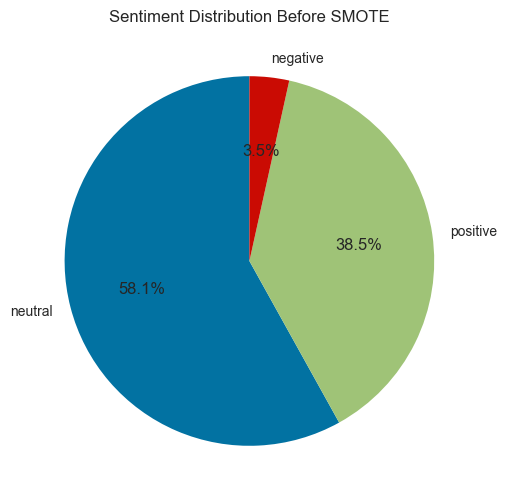

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'movies' is your DataFrame with a 'Sentiment' column
sentiment_counts = movies['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution Before SMOTE')
plt.show()

In [32]:
movies['Review'][0]

'film well reaction wonderful example modern hypocrisythe story adult woman attracted young guy year younger young enough son see boy band concert people reaction start movie trailer beyond get praise story destruction stigma happiness woman remain attractive age man happiness available anyone u judge someone elses lovebut story man age attracted girl girl band girl year younger would get story disgusting creep find way overcome midlife crisis preadatory pursue girl young enough daughter'

In [33]:
movies['Sentiment'][0]

'positive'

In [34]:
# Verify class balance
sentiment_counts = movies['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 Sentiment
neutral     5807
positive    3847
negative     346
Name: count, dtype: int64


In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Initializes the TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['Review']).toarray()  # Creates the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())  # Creates a DataFrame from the TF-IDF matrix
tfidf_df['Sentiment'] = movies['Sentiment']  # Adds the 'Sentiment' column to the DataFrame


In [36]:
# Show shape before SMOTE
print("Shape before SMOTE:", tfidf_df.shape)


Shape before SMOTE: (10000, 1001)


In [37]:
# Apply SMOTE to balance the classes
X = tfidf_df.drop('Sentiment', axis=1)  # Separates features (X) from target (y)
y = tfidf_df['Sentiment']  # Assigns target variable
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Initializes SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)  # Applies SMOTE to balance classes


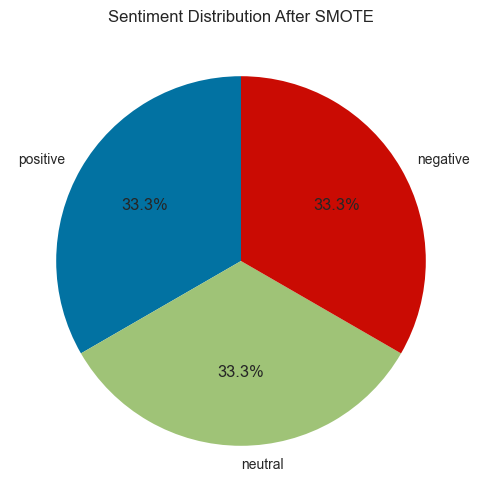

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'y_resampled' is the resampled target variable after SMOTE
resampled_sentiment_counts = pd.Series(y_resampled).value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(resampled_sentiment_counts, labels=resampled_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution After SMOTE')
plt.show()

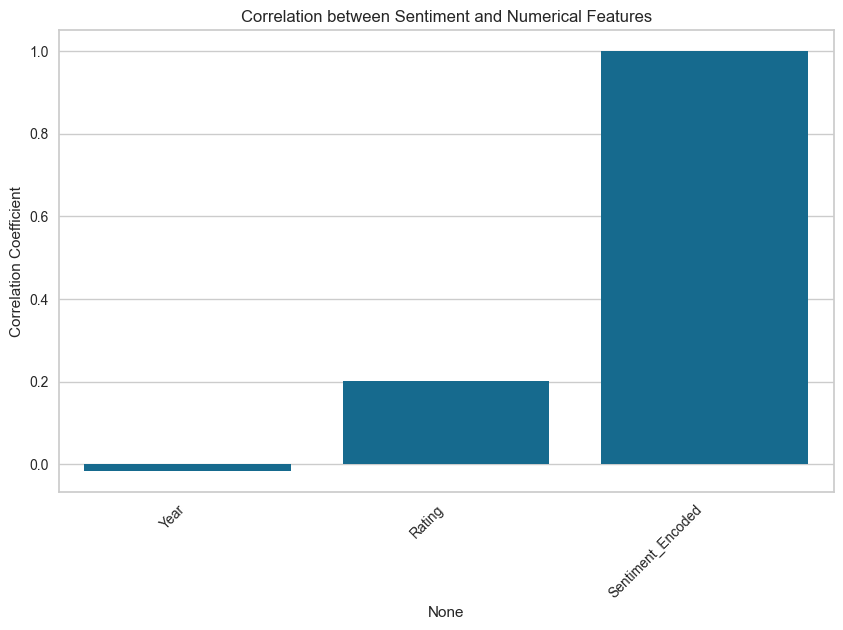

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'movies' is your DataFrame and 'Sentiment' is the target variable

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your 'Sentiment' column and transform it
movies['Sentiment_Encoded'] = label_encoder.fit_transform(movies['Sentiment'])

# Select numerical features for correlation analysis (including 'Sentiment_Encoded')
numerical_features = movies.select_dtypes(include=['number'])  

# Calculate correlations between numerical features and 'Sentiment_Encoded'
correlations = numerical_features.corrwith(movies['Sentiment_Encoded'])

# Create a bar plot to visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation between Sentiment and Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.show()

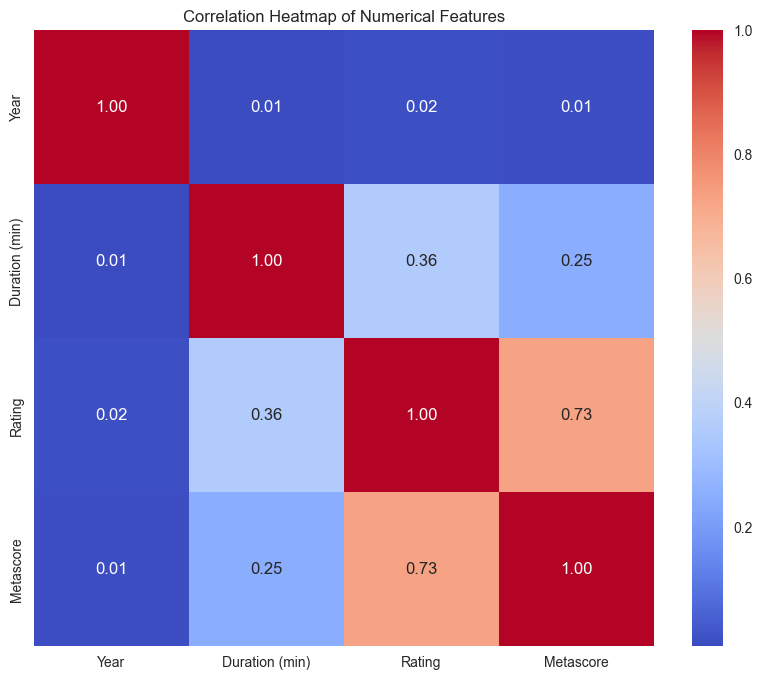

In [44]:
# prompt: give code for correlation heat map of numerical features from df

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already loaded and preprocessed

# Select numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [70]:
import pickle
# Save the vectorizer after SMOTE (it remains the same)
with open('tfidf_vectorizer_sentiment.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Create a new DataFrame with the resampled data
tfidf_df_resampled = pd.DataFrame(X_resampled, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_resampled['Sentiment'] = y_resampled

# Save the resampled TF-IDF DataFrame
with open('tfidf_matrix_sentiment.pkl', 'wb') as f:
    pickle.dump(tfidf_df_resampled, f)

In [38]:
# Show shape after SMOTE
print("Shape after SMOTE:", X_resampled.shape)


Shape after SMOTE: (17421, 1000)


In [39]:
# After SMOTE: Analyze sentiment distribution in resampled data
resampled_sentiment_counts = pd.Series(y_resampled).value_counts()
print("Sentiment Distribution After SMOTE:\n", resampled_sentiment_counts)


Sentiment Distribution After SMOTE:
 Sentiment
positive    5807
neutral     5807
negative    5807
Name: count, dtype: int64


In [40]:
# Initialize PyCaret Setup with resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Sentiment'] = y_resampled


In [41]:
from collections import Counter # Import the Counter class from collections module


In [76]:
# Define the models you want to evaluate
models_to_include = [ 'svm', 'dt', 'rf', 'ridge', 'knn', 'nb', 'xgboost']


# Initialize the setup (replace 'your_data' with your actual dataset)
clf = setup(data=resampled_df, target='Sentiment', use_gpu=False)

# Get y_train from the PyCaret setup
y_train = get_config('y_train')

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train))  # y_train is now accessible

,Description,Value
0,Session id,6542
1,Target,Sentiment
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(17421, 1001)"
5,Transformed data shape,"(17421, 1001)"
6,Transformed train set shape,"(12194, 1001)"
7,Transformed test set shape,"(5227, 1001)"
8,Numeric features,1000
9,Preprocess,True


Class distribution after SMOTE: Counter({'negative': 4065, 'neutral': 4065, 'positive': 4064})


In [77]:
# Compare only those 1 models
best_model = compare_models(include=models_to_include, n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8842,0.9723,0.8842,0.8834,0.8836,0.8263,0.8265,20.6750
rf,Random Forest Classifier,0.8619,0.9612,0.8619,0.8613,0.8610,0.7929,0.7934,2.3350
svm,SVM - Linear Kernel,0.8576,0.0000,0.8576,0.8570,0.8542,0.7865,0.7892,4.1440
ridge,Ridge Classifier,0.8441,0.0000,0.8441,0.8420,0.8403,0.7662,0.7686,0.6110
nb,Naive Bayes,0.7765,0.8922,0.7765,0.7718,0.7692,0.6648,0.6692,0.6450
dt,Decision Tree Classifier,0.7560,0.8170,0.7560,0.7511,0.7529,0.6340,0.6346,1.8580
knn,K Neighbors Classifier,0.6557,0.7950,0.6557,0.7506,0.5662,0.4836,0.5423,1.2910


In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# You can view the mapping of labels
print(label_encoder.classes_)  # ['negative' 'neutral' 'positive']


['negative' 'neutral' 'positive']


In [43]:
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}, Encoded Value: {i}")

Class: negative, Encoded Value: 0
Class: neutral, Encoded Value: 1
Class: positive, Encoded Value: 2


In [44]:
y_resampled_encoded

array([2, 1, 1, ..., 2, 2, 2])

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)


In [47]:
from collections import Counter

print("Test set class distribution:", Counter(y_test))


Test set class distribution: Counter({0: 1172, 2: 1160, 1: 1153})


In [48]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)

# Define the parameter distribution (instead of a grid)
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 2]
}


In [50]:
# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=75,  # Number of random samples to test
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [51]:
# Perform randomized search
random_search.fit(X_resampled, y_resampled_encoded)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 1, 2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [52]:
# Best parameters and model
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


In [53]:
# Extract the best model
best_xgb_model = random_search.best_estimator_


In [54]:
# Optionally, print the best score from the random search
print("Best Accuracy:", random_search.best_score_)

Best Accuracy: 0.8737156305608175


In [55]:
# Evaluate the best model
y_pred = best_xgb_model.predict(X_test)
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9865136298421808
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       0.98      0.98      0.98      1153
           2       0.98      0.98      0.98      1160

    accuracy                           0.99      3485
   macro avg       0.99      0.99      0.99      3485
weighted avg       0.99      0.99      0.99      3485



In [60]:
from collections import Counter

print("Training set class distribution:", Counter(y_resampled_encoded))
print("Test set class distribution:", Counter(y_test))  # Should remain imbalanced


Training set class distribution: Counter({2: 5807, 1: 5807, 0: 5807})
Test set class distribution: Counter({0: 1172, 2: 1160, 1: 1153})


In [57]:
print("Original class distribution:", Counter(y))


Original class distribution: Counter({'neutral': 5807, 'positive': 3847, 'negative': 346})


In [62]:
y_pred = best_xgb_model.predict(X_test)
print("y_test unique values:", pd.Series(y_test).unique())
print("y_pred unique values:", pd.Series(y_pred).unique()) # y_pred is a numpy array, access it directly

y_test unique values: [0 1 2]
y_pred unique values: [0 1 2]


In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


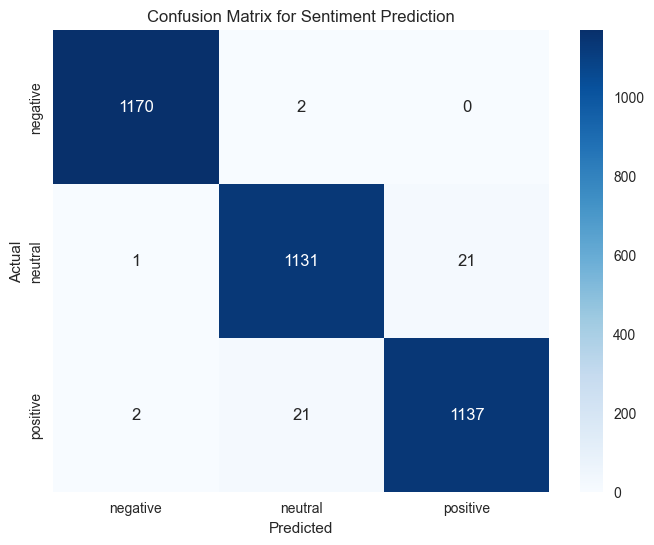

In [65]:
# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Sentiment Prediction")
plt.show()


In [66]:
import pickle

# Extract the best model from random_search
best_xgb_model = random_search.best_estimator_

# Save the model using pickle
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

print("Best XGBClassifier model saved as 'best_xgb_model.pkl'.")

Best XGBClassifier model saved as 'best_xgb_model.pkl'.


In [67]:
movies.iloc[1]

Poster         https://m.media-amazon.com/images/M/MV5BZGI4NT...
Title                          Kingdom of the Planet of the Apes
Year                                                      2023.0
Genre                                  Action, Adventure, Sci-Fi
Rating                                                       7.3
Director                                                Wes Ball
Cast                      Owen Teague, Freya Allan, Kevin Durand
Description    [Many, years, after, the, reign, of, Caesar,, ...
Review         im big fan planet ape nailed one usually start...
Sentiment                                                neutral
Name: 1, dtype: object

In [68]:
movies['Review'][1]

'im big fan planet ape nailed one usually start milking series like come bad amazing cinematography great acting succeeded movie deserve watched big screen one movie intrigued interested storyline unlike lot movie ive seen year im looking forward come assure watching matter go grab popcorn enjoy phenomenal graphic movie offer godspeed'

In [72]:
import numpy as np
# Define new reviews for prediction
new_reviews = [
   'got austin premier sxsw whole theatre went nut movie emily ryan crazy chemistry obviously freaking amazing time shooting ton fun packed incredible stunt none cgi funny charming exciting every second camera work flawless cinematography beautiful casting perfect costume cool af dog fan original series loved movie celebration stund craft people beautiful reminiscence original defo watching officially launch god love ryan emily thank much david leitch making happen seriously whatever touch incredibly fun watch cant wait next one'
]
# Preprocess the new reviews (similar to training data preprocessing)
def preprocess_review(review):
    review = review.lower()
    review = re.sub(r'http\S+|www\S+|https\S+', '', review)
    review = re.sub(r'@\w+|#\w+', '', review)
    review = re.sub(r'[^a-z\s]', '', review)
    words = word_tokenize(review)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return TreebankWordDetokenizer().detokenize(words)
# Preprocess each review
processed_reviews = [preprocess_review(review) for review in new_reviews]
# Transform the reviews using the TF-IDF vectorizer
tfidf_features = tfidf_vectorizer.transform(processed_reviews).toarray()
# Predict sentiments
predicted_sentiments = best_xgb_model.predict(tfidf_features)
# Map numerical labels back to sentiment labels
label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
predicted_sentiments_labels = [label_mapping[label] for label in predicted_sentiments]
# Display predictions
for review, sentiment in zip(new_reviews, predicted_sentiments_labels):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: got austin premier sxsw whole theatre went nut movie emily ryan crazy chemistry obviously freaking amazing time shooting ton fun packed incredible stunt none cgi funny charming exciting every second camera work flawless cinematography beautiful casting perfect costume cool af dog fan original series loved movie celebration stund craft people beautiful reminiscence original defo watching officially launch god love ryan emily thank much david leitch making happen seriously whatever touch incredibly fun watch cant wait next one
Predicted Sentiment: positive



In [73]:
# Create combined features with weighted importance for each feature
movies['combined_features'] = (
    movies['Title'] + ' ' +
    movies['Title'] + ' ' +
    movies['Genre'].astype(str) + ' ' +  # Genre gets a higher weight
    movies['Genre'].astype(str) + ' ' +  # Repeat Genre to simulate higher weight
    movies['Director'].astype(str) + ' ' +  # Director gets moderate weight
    movies['Director'].astype(str) + ' ' +  # Repeat Director for higher weight
    movies['Cast'].astype(str) + ' ' +
    movies['Description'].astype(str)
)


In [74]:
# Vectorize the combined features
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)
tfidf_matrix = vectorizer.fit_transform(movies['combined_features'])


In [75]:
import pickle

# Save the vectorizer
with open('vectorizer_recommendation.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the TF-IDF matrix
with open('tfidf_matrix_recommendation.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

In [76]:

from fuzzywuzzy import process  # Import the process module
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
# Function to get movie recommendations based on all features
def get_recommendations(movie_title, data, tfidf_matrix, num_recommendations=5, similarity_threshold=0.2):
    # Use fuzzy matching to find the best movie title match
    best_match = process.extractOne(movie_title, data['Title'].values)
    if not best_match or best_match[1] < 80:  # If the match score is too low
        return "Movie not found in the dataset."

    movie_title = best_match[0]

    # Find the index of the movie in the dataset
    movie_idx = data[data['Title'] == movie_title].index[0]

    # Calculate the cosine similarity between the movie and all other movies based on combined features
    cosine_sim = cosine_similarity(tfidf_matrix[movie_idx], tfidf_matrix)

    # Sort the movies based on similarity (excluding the input movie)
    similar_indices = cosine_sim.argsort()[0][::-1][1:num_recommendations+1]

    # Filter out recommendations that have low similarity
    recommendations = []
    for idx in similar_indices:
        if cosine_sim[0][idx] >= similarity_threshold:
            recommendations.append(data.iloc[idx][['Title', 'Genre', 'Director', 'Cast', 'Description']].to_dict())

    if not recommendations:
        return "No recommendations found with sufficient similarity."

    # Format the recommendations as a DataFrame
    recommendations_df = pd.DataFrame(recommendations)

    return recommendations_df

In [79]:
movies.iloc[1]

Poster               https://m.media-amazon.com/images/M/MV5BZGI4NT...
Title                                Kingdom of the Planet of the Apes
Year                                                            2023.0
Genre                                        Action, Adventure, Sci-Fi
Rating                                                             7.3
Director                                                      Wes Ball
Cast                            Owen Teague, Freya Allan, Kevin Durand
Description          [Many, years, after, the, reign, of, Caesar,, ...
Review               im big fan planet ape nailed one usually start...
Sentiment                                                      neutral
combined_features    Kingdom of the Planet of the Apes Kingdom of t...
Name: 1, dtype: object

In [80]:
movies.head(5)

,Poster,Title,Year,Genre,Rating,Director,Cast,Description,Review,Sentiment,combined_features
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin","[Solène,, a, 40-year-old, single, mom,, begins...",film well reaction wonderful example modern hy...,positive,"The Idea of You The Idea of You Comedy, Drama,..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand","[Many, years, after, the, reign, of, Caesar,, ...",im big fan planet ape nailed one usually start...,neutral,Kingdom of the Planet of the Apes Kingdom of t...
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett","[In, 1963, Michigan,, business, rivals, Kellog...",pretty much worst criticism lay comedian true ...,neutral,"Unfrosted Unfrosted Biography, Comedy, History..."
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnson","[A, down-and-out, stuntman, must, find, the, m...",got austin premier sxsw whole theatre went nut...,positive,"The Fall Guy The Fall Guy Action, Comedy, Dram..."
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor","[Tashi,, a, former, tennis, prodigy, turned, c...",tough one liked concept overall story however ...,neutral,"Challengers Challengers Drama, Romance, Sport ..."


In [81]:
movies['Review'][0]

'film well reaction wonderful example modern hypocrisythe story adult woman attracted young guy year younger young enough son see boy band concert people reaction start movie trailer beyond get praise story destruction stigma happiness woman remain attractive age man happiness available anyone u judge someone elses lovebut story man age attracted girl girl band girl year younger would get story disgusting creep find way overcome midlife crisis preadatory pursue girl young enough daughter'

In [82]:
# Example usage
movie_to_recommend = " The Idea of You	"  # Replace with any movie in your dataset
recommendations = get_recommendations(movie_to_recommend, movies, tfidf_matrix)
print(f"Recommendations for {movie_to_recommend}:\n", recommendations)

Recommendations for  The Idea of You	:
                                  Title                   Genre  \
0  Gouttes d'eau sur pierres brûlantes  Comedy, Drama, Romance   
1               The 40 Year Old Virgin         Comedy, Romance   
2             The Five-Year Engagement  Comedy, Drama, Romance   
3                 Call Me by Your Name          Drama, Romance   
4                           Home Again  Comedy, Drama, Romance   

              Director                                               Cast  \
0        François Ozon    Bernard Giraudeau, Malik Zidi, Ludivine Sagnier   
1          Judd Apatow          Steve Carell, Catherine Keener, Paul Rudd   
2     Nicholas Stoller              Jason Segel, Emily Blunt, Chris Pratt   
3      Luca Guadagnino  Timothée Chalamet, Armie Hammer, Michael Stuhl...   
4  Hallie Meyers-Shyer   Reese Witherspoon, Michael Sheen, Candice Bergen   

                                         Description  
0  [In, 1970s, Germany,, a, 50-year-old, busi

In [91]:
import pickle

In [44]:
movies.to_pickle('movies1.pkl')  # Save DataFrame to a pickle file

In [ ]:
import pycaret
print(pycaret.__version__)
